<a href="https://colab.research.google.com/github/lokedina1998/ds-project/blob/main/Live_Case_Study_Resale_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the data
df = pd.read_csv('~/Desktop/Desktop/One_Step_Grow/Singapore_House_Price_Prediction/Flat prices.csv')
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [ ]:
# Getting the shape of the data
print('Shape of the data :', df.shape)

Shape of the data : (92270, 11)


In [ ]:
# Checking NULL values
df.isnull().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
remaining_lease        False
resale_price           False
dtype: bool

In [ ]:
# Checking NULL values
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [ ]:
# Simple Data Pre-Processing to convert 'remaining_lease' and 'storey_range'
# in numerical format

In [ ]:
# dealing with columns mentioned above
df.loc[:, 'storey_avg'] = 0
df.loc[:, 'storey_var'] = 0

for i in df.index:
    tmp = df['remaining_lease'][i].split(' ')
    if (len(tmp) == 2):
        df['remaining_lease'][i] = float(tmp[0])
    else:
        df['remaining_lease'][i] = float(tmp[0]) + int(tmp[2])/ 12.0
    
    tmp = df['storey_range'][i].split(' ')
    df['storey_avg'][i] = (float(tmp[0]) + float(tmp[2])) / 2.0
    df['storey_var'][i] = df['storey_avg'][i] - float(tmp[0])

del df['storey_range']

df['remaining_lease'] = pd.DataFrame(df['remaining_lease'], dtype = np.float)
df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,storey_avg,storey_var
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,1979,61.333333,232000.0,11,1
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,67.0,New Generation,1978,60.583333,250000.0,2,1
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,67.0,New Generation,1980,62.416667,262000.0,2,1
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,68.0,New Generation,1980,62.083333,265000.0,5,1
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,67.0,New Generation,1980,62.416667,265000.0,2,1


In [ ]:
# Getting Statistical Information
df.describe()

,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,storey_avg,storey_var
count,92270.000000,92270.000000,92270.000000,9.227000e+04,92270.000000,92270.0
mean,97.768362,1994.444175,74.773286,4.448869e+05,8.638853,1.0
std,24.263575,13.064066,13.020360,1.548243e+05,5.807275,0.0
min,31.000000,1966.000000,44.833333,1.400000e+05,2.000000,1.0
25%,82.000000,1984.000000,64.666667,3.330000e+05,5.000000,1.0
50%,95.000000,1995.000000,74.833333,4.150000e+05,8.000000,1.0
75%,113.000000,2003.000000,84.250000,5.200000e+05,11.000000,1.0
max,249.000000,2019.000000,97.750000,1.258000e+06,50.000000,1.0


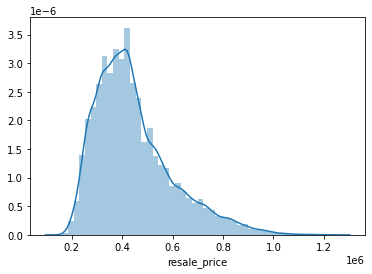

In [ ]:
# Density Curve
sns.distplot(df['resale_price'], kde = True)

In [ ]:
# There are some outliers in the right tail region after 750000.

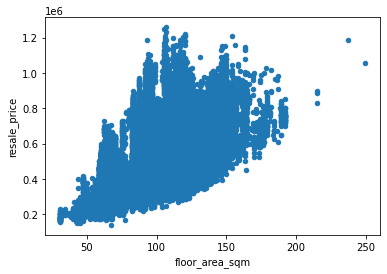

In [ ]:
# Relationship between numerical input features
data = pd.concat([df['resale_price'], df['floor_area_sqm']], axis = 1)
data.plot.scatter(x = 'floor_area_sqm', y = 'resale_price')

In [ ]:
# There is a weak positive correlation between floor area and resale price.

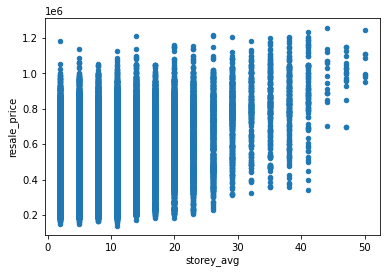

In [ ]:
# Relationship between numerical input features
data = pd.concat([df['resale_price'], df['storey_avg']], axis = 1)
data.plot.scatter(x = 'storey_avg', y = 'resale_price')

In [ ]:
# There is approximately no correlation between storey avg and resale price.

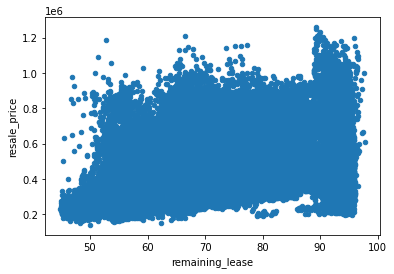

In [ ]:
# Relationship between numerical input features
data = pd.concat([df['resale_price'], df['remaining_lease']], axis = 1)
data.plot.scatter(x = 'remaining_lease', y = 'resale_price')

In [ ]:
# The relationship between remaining lease and resale price is not clear.

Text(0.5, 1.0, 'Correlation betwen features')

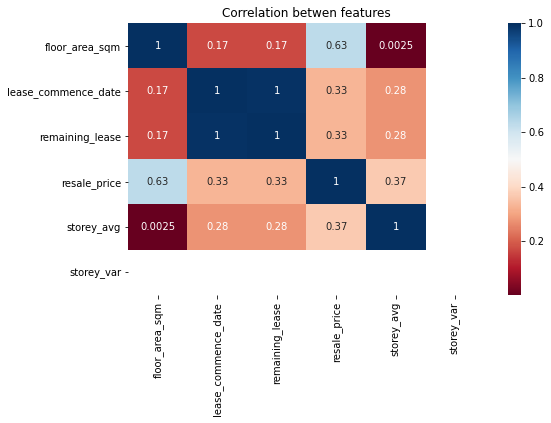

In [ ]:
# Correlation HeatMap
plt.figure(figsize = (8, 5))
sns.heatmap(df.corr(), cmap = 'RdBu', annot = True)
plt.title('Correlation betwen features')

In [ ]:
# We can drop storey_var feature.
# floor_area_sqm is having a moderate positive relationship with resale_price.
# lease_commencement_date and remaining_lease are perfectly correlated.

In [ ]:
# Chi-Squared Test
# For testing independence of categorical features
from scipy.stats import chi2_contingency

# Function
def test_cat_depend(feat1, feat2):
    # grouping and counting
    obs = pd.crosstab(df[feat1], df[feat2])
    # chi2 test
    chi2, p_val, dof, expecte = chi2_contingency(obs)
    print('Test Result ({}, {}) :'.format(feat1, feat2))
    print('-'*20)
    print('p_val : {}'.format(p_val))
    if (p_val < 0.05):
        print('{} and {} are independent !'.format(feat1, feat2))
    else:
        print('{} and {} are dependent !'.format(feat1, feat2))
    print('-'*20)

In [ ]:
# Creating the list of numerical features and categorical features
cat_feats = ['month','town','flat_type','block','street_name','flat_model']
num_feats = ['floor_area_sqm','lease_commence_date','remaining_lease','storey_avg']

In [ ]:
# Call Chi_Squared Function
for i in range(1, len(cat_feats)-1):
    for j in range(i+1, len(cat_feats)):
        test_cat_depend(cat_feats[i], cat_feats[j])

Test Result (town, flat_type) :
--------------------
p_val : 0.0
town and flat_type are independent !
--------------------
Test Result (town, block) :
--------------------
p_val : 0.0
town and block are independent !
--------------------
Test Result (town, street_name) :
--------------------
p_val : 0.0
town and street_name are independent !
--------------------
Test Result (town, flat_model) :
--------------------
p_val : 0.0
town and flat_model are independent !
--------------------
Test Result (flat_type, block) :
--------------------
p_val : 0.0
flat_type and block are independent !
--------------------
Test Result (flat_type, street_name) :
--------------------
p_val : 0.0
flat_type and street_name are independent !
--------------------
Test Result (flat_type, flat_model) :
--------------------
p_val : 0.0
flat_type and flat_model are independent !
--------------------
Test Result (block, street_name) :
--------------------
p_val : 0.0
block and street_name are independent !
-----

In [ ]:
# All the categorical features are independent.

In [ ]:
# ANOVA Test to select categorical features
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

tmp = ''
for i in range(len(cat_feats)):
    tmp += 'C({})+'.format(cat_feats[i])
tmp = tmp[:-1]

# Ordinary Least Square Model
model = ols('resale_price ~ {}'.format(tmp), df).fit()
anova_lm(model)

In [ ]:
# Splitting the data into input features and target variable
X = df.drop('resale_price', axis = 1)
y = df['resale_price']

In [ ]:
# One Hot Encoding and Standardizing
from sklearn.preprocessing import StandardScaler
# use pd.get_dummies for OHE
X = pd.get_dummies(X, columns = cat_feats)

# Use StandardScaler to Standardize
scaler = StandardScaler()
X[num_feats] = scaler.fit_transform(X[num_feats])

# Getting Statistical properties
X.describe()

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_State = 7)

In [ ]:
# Defining functions for model evaluation
# Importing important libraries
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

def evaluation(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r_squared = r2_score(y_true, y_pred)
    return mae, mse, r_squared

def rmse_cv(model):
    # using 5 fold cross validation
    rmse = np.sqrt(~cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv = 5)).mean()
    return rmse

In [ ]:
# Let us try the following models -
# (1) SVM
# (2) Random Forest

In [ ]:
# SVM
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')

# Fitting the model
svr.fit(X_train, y_train)

# Predicting from the model
y_pred = svr.predict(X_test)

In [ ]:
# Evaluation
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print('MAE :', mae)
print('MSE :', mse)
print('RMSE :', rmse)
print('R2 Score :', r_squared)

In [ ]:
# Random Forest Algorithm is for assignment.